In [9]:
from TO_sim.get_simul import get_r_y
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from TO_sim.get_rrrp import get_K_r_rp

In [13]:
K = 0
seed = 11
N = 5000
m = 6
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
omega = omega - np.mean(omega)
omega = np.sort(omega)
Y = np.r_[theta_random,theta_random]

In [70]:
r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd,y_,avg_theta,c_s = get_r_y(K,m,Y,omega,N)

SystemError: CPUDispatcher(<function RK4_short_theta_store_r_y at 0x0000024B5D44E980>) returned a result with an exception set

In [14]:
Ks = np.arange(0,15,0.005)
r0s = []
rps = []
rms = []
rss = []

rpls = []
rmls = []
N0s = []
NPs = []
NMs = []

c_ss = []
avg_thetas = []
y_s = []

for K in tqdm(Ks):
    r0,rp,rm,rs,rpl,rml,N0,NP,NM,rstd,Y,avg_theta,c_s = get_r_y(K,m,Y,omega,N,tend=2500)
    r0s.append(r0)
    rps.append(rp)
    rms.append(rm)
    rss.append(rs)
    rpls.append(rpl)
    rmls.append(rml)
    N0s.append(N0)
    NPs.append(NP)
    NMs.append(NM)
    c_ss.append(c_s)
    avg_thetas.append(avg_theta)
    y_s.append(Y.copy())

100%|██████████| 3000/3000 [5:58:50<00:00,  7.18s/it]  


In [28]:
np.savez('DATA_hys cluster dK 0.005.npz',Ks=Ks,r0s=r0s,rps=rps,rms=rms,rss=rss,rpls=rpls,rmls=rmls,N0s=N0s,NPs=NPs,NMs=NMs)
np.savez('DATA_hys avg_thetas dK 0.005.npz',Ks=Ks,avg_thetas=avg_thetas)
np.savez('DATA_hys y_s dK 0.005.npz',Ks=Ks,y_s=y_s)
np.savez('DATA_hys c_ss dK 0.005.npz',Ks=Ks,c_ss=c_ss)

In [4]:
K_ = np.linspace(0,15,10001)
R_u,R_0u,RP1_u,RPl_u = get_K_r_rp(m,K_)

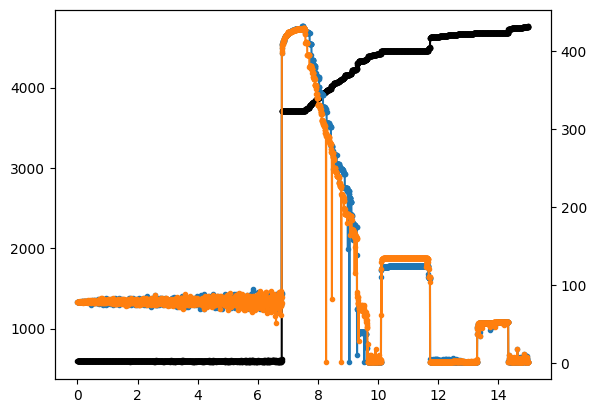

In [15]:

plt.plot(Ks,N0s,'k.-')
plt.twinx()
plt.plot(Ks,NPs,'.-')
plt.plot(Ks,NMs,'.-')


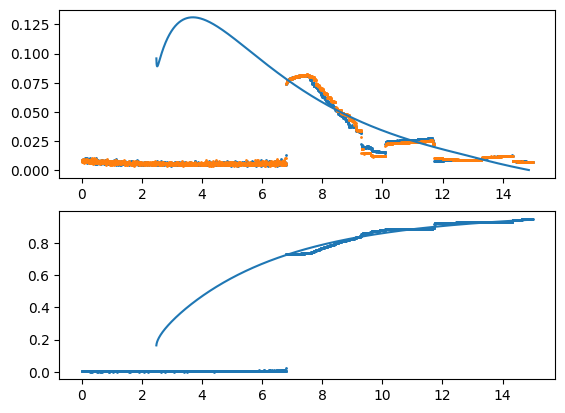

In [27]:
plt.subplot(211)

# plt.scatter(Ks,r0s,s=1)
# plt.scatter(Ks,rms,s=1)
# plt.scatter(Ks,rps,s=1)

plt.scatter(Ks,rms,s=1)
plt.scatter(Ks,rps,s=1)
plt.plot(K_,RP1_u)


plt.subplot(212)

plt.scatter(Ks,r0s,s=1)
plt.plot(K_,R_0u)

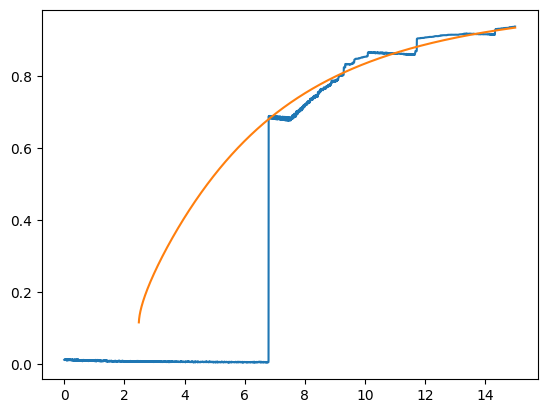

In [34]:
plt.plot(Ks,rss)
plt.plot(K_,R_u)

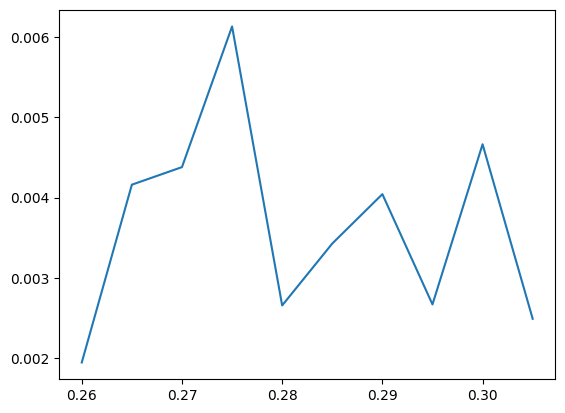

In [18]:
plt.plot(Ks[52:62],r0s[52:62])

In [19]:
avg_thetas = np.array(avg_thetas)

In [20]:
types = []
Ns = np.arange(N)
type_ = np.nan * np.ones(N)
for i, c_s in enumerate(c_ss):
    _0 = Ns[c_s['0']]
    _p = Ns[c_s['+l']]
    _m = Ns[c_s['-l']]
    TY = type_.copy()
    TY[_0] = 0
    TY[_p] = +1
    TY[_m] = -1
    types.append(TY)
# types를 color로 mapping하는 colormap을 만듭니다.
from matplotlib.colors import ListedColormap

# 예시: type이 -1, 0, +1이므로, 각각 파랑, 회색, 빨강으로 지정
type_colors = {-1: 'blue', 0: 'grey', 1: 'red'}

# N개에 대해, 각 type 값에 맞는 색상을 리스트로 변환
def map_types_to_colors(type_array):
    return [type_colors.get(t, 'black') for t in type_array]

# types 리스트 전체를 색상 리스트로 변환
# (만약 각 types가 shape (N,)라면 목록 생성, shape가 다르면 적절히 수정)
types_colors = [map_types_to_colors(TY) for TY in types]


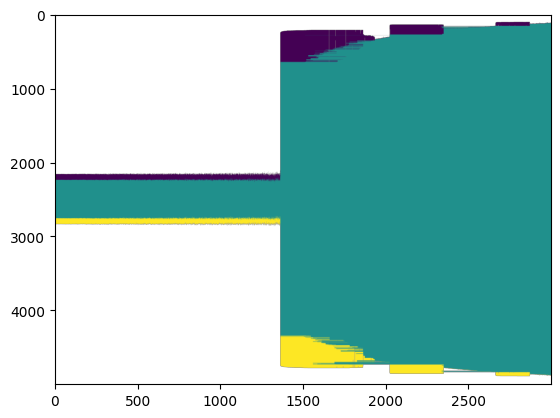

In [21]:
plt.imshow(np.array(types).T)
plt.gca().set_aspect('auto')

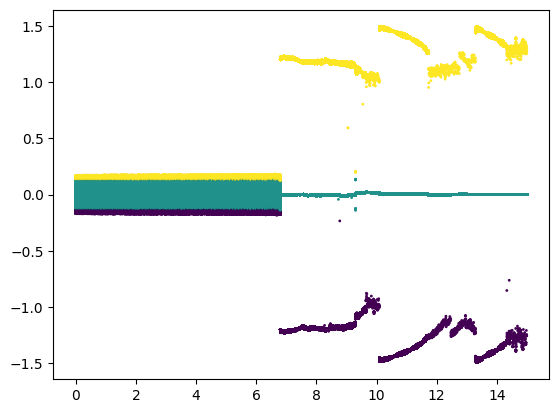

In [22]:
plt.scatter(np.ones_like(avg_thetas)*Ks.reshape(-1,1),avg_thetas,c=types,s=1);

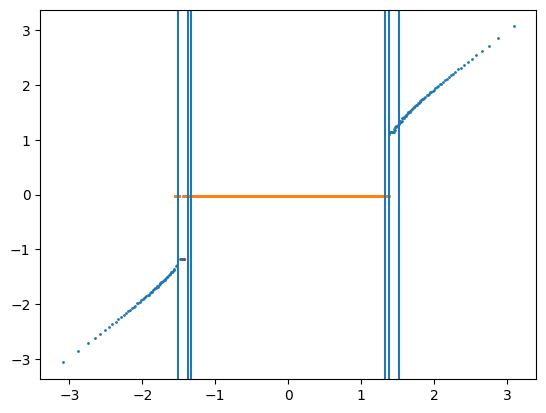

In [185]:
idx =  80
plt.scatter(omega,avg_thetas[idx],s=1)
_0 = c_ss[idx-1]['0']
_p = c_ss[idx-1]['+l']
_m = c_ss[idx-1]['-l']
plt.scatter(omega[_0],avg_thetas[idx][_0],s=1)
plt.scatter(omega[_p],avg_thetas[idx][_p],s=1)
plt.scatter(omega[_m],avg_thetas[idx][_m],s=1)
op = 4/np.pi*np.sqrt(Ks[idx-1]*r0s[idx-1]/m) - 0.3056/np.sqrt(Ks[idx-1]*r0s[idx-1]*m**3)
delta_p = (Ks[idx-1]**2*r0s[idx-1]*rps[idx-1])/(2*m*(1/m**2+(op)**2)) + (Ks[idx-1]**2*rps[idx-1]*rps[idx-1])/(2*m**2*op*(1/m**2+(2*op)**2))
opp = 4/np.pi*np.sqrt(Ks[idx-1]*rps[idx-1]/m) - 0.3056/np.sqrt(Ks[idx-1]*rps[idx-1]*m**3)
plt.axvline(op)
plt.axvline(-op)
plt.axvline(op+delta_p)
plt.axvline(op+delta_p+opp)

plt.axvline(-(op+delta_p))
plt.axvline(-(op+delta_p+opp))

In [23]:
N_00 = []
N_0P = []
N_P0 = []
N_PP = []

P_00 = []
P_0P = []
P_P0 = []
for i in range(len(Ks)-1):
    _0to0 = np.intersect1d(c_ss[i]['0'], c_ss[i+1]['0'])
    N_00.append(len(_0to0))
    P_00.append(len(_0to0)/len(c_ss[i]['0']))
    _0toP = np.intersect1d(c_ss[i]['0'], c_ss[i+1]['+l'])
    N_0P.append(len(_0toP))
    P_00.append(len(_0toP)/len(c_ss[i]['0']))
    
    _Pto0 = np.intersect1d(c_ss[i]['+l'], c_ss[i+1]['0'])
    _PtoP = np.intersect1d(c_ss[i]['+l'], c_ss[i+1]['+l'])
    N_P0.append(len(_Pto0))
    N_PP.append(len(_PtoP))

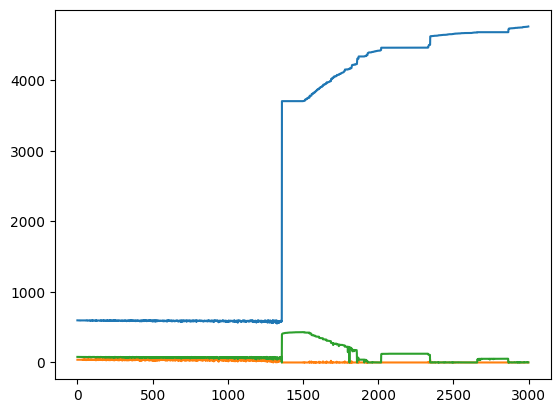

In [24]:
plt.plot(N_00)
# plt.plot(N_0P)
plt.plot(N_P0)
plt.plot(N_PP)
# plt.plot(np.array(P_00))

In [ ]:
J_p_to0

array([277, 278, 279])

In [157]:
for i,c_s in enumerate(c_ss):
    # P_v = avg_thetas[i][c_s['+l']]
    # M_v = avg_thetas[i][c_s['-l']]
    P_now = c_s['+l']
    P_prev = c_s['+l']

    # plt.scatter(Ks[i]*np.ones(len(P_v)),P_v,color='r',s=1);
    # plt.scatter(Ks[i]*np.ones(len(M_v)),M_v,color='b',s=1);

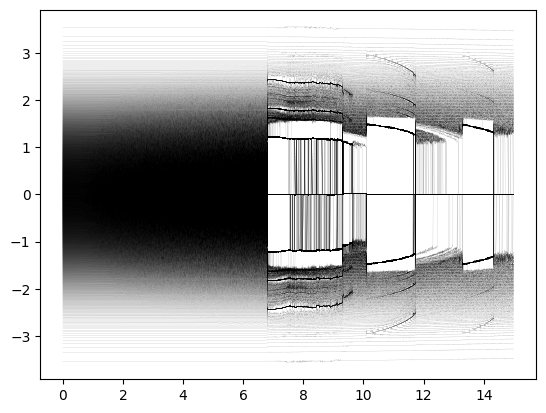

In [29]:
# plt.subplot(211)

plt.plot(Ks,avg_thetas,c='k',alpha=0.5,lw=0.1);
# plt.subplot(212)
# plt.plot(Ks,r0s)
# plt.plot(K_,R_0u)

(-3.0, 0.0)

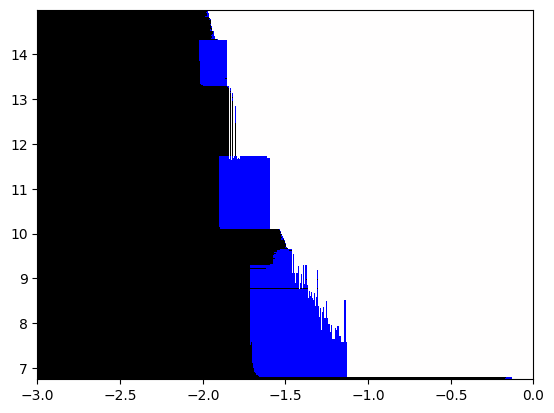

In [32]:
plt.pcolormesh(omega,Ks[675*2:],np.array(types[675*2:]),cmap='bwr')
plt.gca().set_facecolor('k')
plt.xlim(-3,0)

(0.0, 3.0)

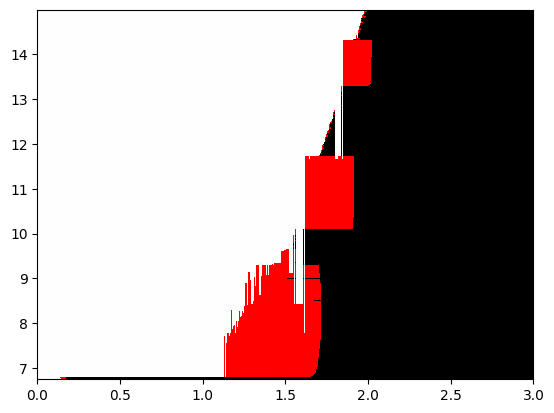

In [33]:
plt.pcolormesh(omega,Ks[675*2:],np.array(types[675*2:]),cmap='bwr')
plt.gca().set_facecolor('k')
plt.xlim(0,3)

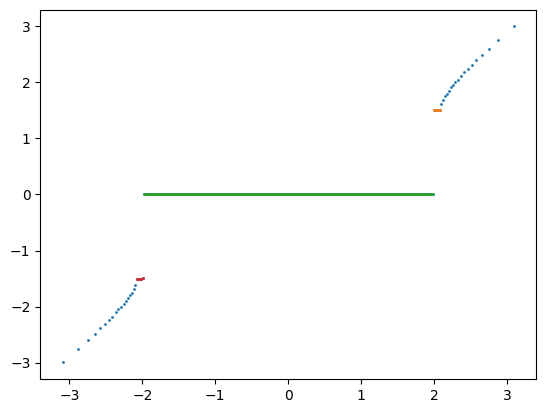

In [73]:
plt.scatter(omega,avg_theta,s=1)
# plt.scatter(omega[c_s['+']],avg_theta[c_s['+']],s=1)
plt.scatter(omega[c_s['+l']],avg_theta[c_s['+l']],s=1)
plt.scatter(omega[c_s['0']],avg_theta[c_s['0']],s=1)
# plt.scatter(omega[c_s['-']],avg_theta[c_s['-']],s=1)
plt.scatter(omega[c_s['-l']],avg_theta[c_s['-l']],s=1)
